In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
sns.set_context('talk')
sns.set_style('ticks')

In [3]:
files=os.listdir()

In [4]:
files

['.ipynb_checkpoints',
 '11019977.hobo',
 'Air.csv',
 'Experiment.hobo',
 'MSL.ipynb',
 'Water.csv']

In [5]:
air_data = pd.read_csv(files[2],skiprows=2)

In [6]:
water_data = pd.read_csv(files[5],skiprows=2)

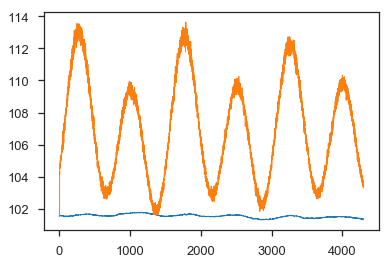

In [7]:
plt.plot(air_data.get_values()[:4300,2],lw=1)
plt.plot(water_data.get_values()[:4300,2],lw=1)


In [8]:
water_data.get_values()[50,2]-air_data.get_values()[50,2]

4.329000000000008

In [9]:
#pressure = ro g h
pressure = (water_data.get_values()[:4300,2]-air_data.get_values()[:4300,2]) * 10**3 #newtons per sq meter
ro = 1.0240 #g/cm^3 or kg/l at 20 C (1.0273 at 0 C)
g = 9.81 #m/s^2
tidal_depth=pressure/(ro*g)/1000 #meters

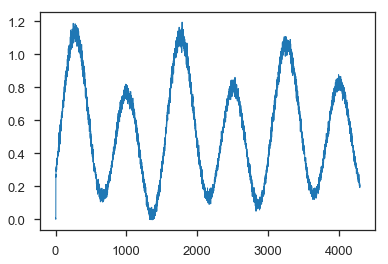

In [10]:
plt.plot(tidal_depth,lw=1)


In [137]:
#control points calibrated with ruler and time stamp
control_points=[]
control_points.append([5,0.306])
control_points.append([87,0.650])
control_points.append([2931,0.146])

#6/24
#4:48 pm - 30.6cm
#6:10 pm - 65.0cm

#6/26   5:34 pm - 14.6cm


In [136]:
air_data.get_values()[2931,1]

'06/26/17 05:34:00 PM'

(-10, 4800)

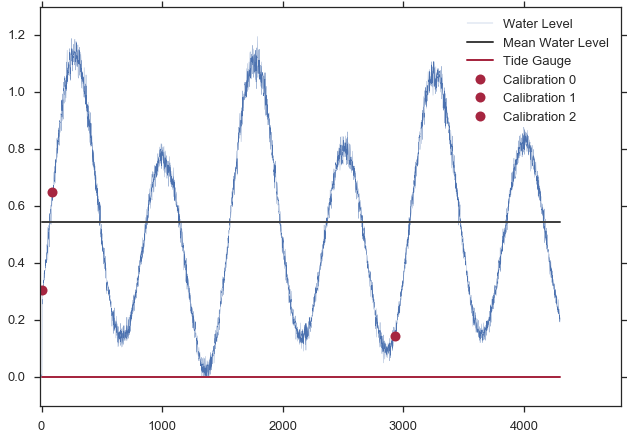

In [138]:
plt.plot(tidal_depth,lw=.25,label='Water Level')
plt.plot([0,4300],[np.nanmean(tidal_depth[1:]),np.nanmean(tidal_depth[1:])],lw=2,color=(.25,.25,.25),
         label='Mean Water Level')
plt.plot([0,4300],[0,0],lw=2,color=(.65,.15,.25),label='Tide Gauge')
for i in range(len(control_points)):
    plt.plot([control_points[i][0]],control_points[i][1],'.',markersize=20,color=(.65,.15,.25),label='Calibration '+str(i))

#plt.plot([0,2100],[1.003,1.003],lw=2,color=(.25,.65,.15),label='Point')
plt.legend(loc='best')
plt.gca().set_ylim([-.1,1.3])
plt.gca().set_xlim([-10,4800])


In [148]:
cost=[]
adjusted_ro = 1.0240
ro_list=[]

for i in range(1000):
    #pressure = ro g h
    pressure = (water_data.get_values()[:4300,2]-air_data.get_values()[:4300,2]) * 10**3 #newtons per sq meter
    adjusted_ro = 1.0240+np.random.normal(0,.000001) #g/cm^3 or kg/l at 20 C (1.0273 at 0 C)
    ro_list.append(adjusted_ro)
    g = 9.81 #m/s^2
    new_tidal_depth=pressure/(adjusted_ro*g)/1000 #meters

    new_cost=np.array(np.sum(np.abs(np.array(control_points)[:,1]
                                    -new_tidal_depth[np.array(control_points)[:,0].astype(int)])))
    cost.append(new_cost)
    
cost=np.array(cost)


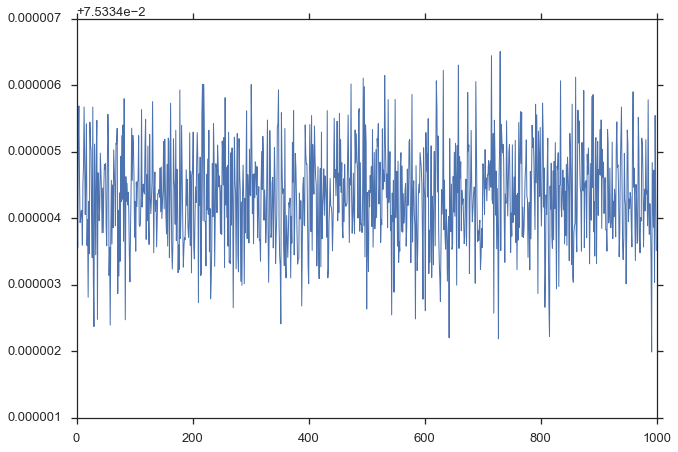

In [149]:
plt.plot(cost,lw=1)

In [141]:
best=np.argsort(cost)[0].astype(int)
best_ro=ro_list[best]
best_tidal_depth=pressure/(adjusted_ro*g)/1000

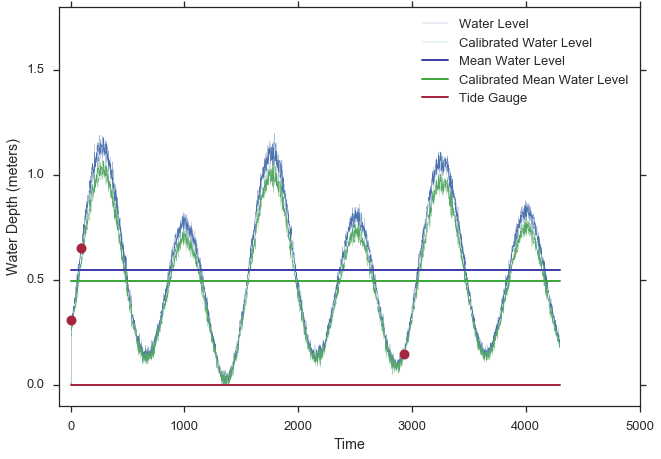

In [142]:
plt.plot(tidal_depth,lw=.25,label='Water Level')
plt.plot(best_tidal_depth,lw=.25,label='Calibrated Water Level')
plt.plot([0,4300],[np.nanmean(tidal_depth[1:]),np.nanmean(tidal_depth[1:])],lw=2,color=(.25,.25,.65),
         label='Mean Water Level')
plt.plot([0,4300],[np.nanmean(best_tidal_depth[1:]),np.nanmean(best_tidal_depth[1:])],lw=2,color=(.25,.65,.25),
         label='Calibrated Mean Water Level')
plt.plot([0,4300],[0,0],lw=2,color=(.65,.15,.25),label='Tide Gauge')
for i in range(len(control_points)):
    plt.plot([control_points[i][0]],control_points[i][1],'.',markersize=20,color=(.65,.15,.25))

#plt.plot([0,2100],[1.003,1.003],lw=2,color=(.25,.65,.15),label='Point')
plt.legend(loc='best')
plt.gca().set_ylim([-0.1,1.8])
plt.gca().set_xlim([-100,5000])
plt.gca().set_ylabel('Water Depth (meters)')
plt.gca().set_xlabel('Time')


In [170]:
water_data['1'].get_values()[-600]

4097

In [144]:
np.nanmean(best_tidal_depth)

0.49445481183896445

In [145]:
best_ro

0.9824790531846797

In [75]:
control_points[0,1]-tidal_depth[control_points[0,0]]

TypeError: list indices must be integers or slices, not tuple

TypeError: list indices must be integers or slices, not tuple

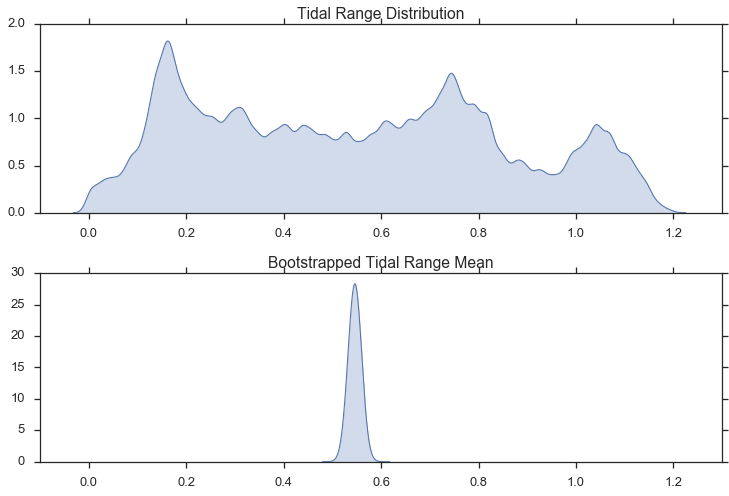

In [64]:
fig=plt.figure()
plt.subplot(211)
sns.kdeplot(tidal_depth,bw=.01,gridsize=1000,lw=1,shade=True)
plt.gca().set_xlim(-.1,1.3)
plt.gca().set_title('Tidal Range Distribution')
plt.subplot(212)
sns.kdeplot(np.array(means),bw=.01,lw=1,gridsize=1000,shade=True)
plt.gca().set_xlim(-.1,1.3)
plt.gca().set_title('Bootstrapped Tidal Range Mean')
fig.tight_layout()


In [42]:
np.percentile(tidal_depth,50)

0.5373582441386336

In [63]:
means=[]
for i in range(10000):
    means.append(np.nanmean(np.random.choice(tidal_depth,1000)))

In [12]:
np.mean(tidal_depth[1:])
#100.3 cm is the tide guage to GPS point
#-40 meters is the GAI
#SL is 39.73

0.5459272387045548

In [ ]:
#TG is -35.78024500000001

In [13]:
MTL=-35.78024500000001+0.5459272387045548

In [14]:
MTL

-35.23431776129545

nassau:-32.491280058549926
crooked:-35.23431776129545
inagua:-38.86993392596613
west caicos from model 801: -40.950693
exuma: 
eleuthera: 
san sal:-38.92888714759474
